***
### DISCLAIMER ###

El presente ipython notebook ha sido creado para el curso **ILI286 - Computación Científica 2**, del [Departamento de Informática](http://www.inf.utfsm.cl/), [Universidad Técnica Federico Santa María](http://www.utfsm.cl/). 

El material ha sido creado por Claudio Torres <ctorres@inf.utfsm.cl> y Sebastian Flores <sebastian.flores@usm.cl>, y es distribuido sin restricciones. En caso de encontrar un error, por favor no dude en contactarnos.

[Update 2015] Se ha actualizado los notebooks a Python 3 e includio el "magic" "%matplotlib inline" antes de cargar matplotlib para que los gráficos se generen en el notebook. 
***

# Integración Numérica

Necesitamos importar las librería numérica y definir una función que nos permitirá graficar apropiadamente.

In [6]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

###########################################################################
# General plotting framework
###########################################################################
def plot(f, xbin, ybin, int_val, N, text, figname=""):
  plt.figure(figsize=(12,6))
  n = 201
  # Get a representation of f as a continuous function
  x = np.linspace(xbin.min(), xbin.max(), n)
  y = f(x)
  # Plot the function
  plt.plot(x, y, 'r', lw=2.0)
  # Plot the interpolation
  plt.fill_between(xbin, 0, ybin, alpha=0.25, lw=2.0)
  # Setting the lims
  ymin, ymax = y.min(), y.max()
  if abs(ymax-ymin)<1E-6:
    ymin, ymax = 0.0, 1.0
  dy = .1*(ymax-ymin)
  plt.ylim([ymin-dy,ymax+dy])
  xmin, xmax = x.min(), x.max()
  if abs(b-a)<1E-6:
    xmin, xmax = 0.0, 1.0
  dx = .1*(b-a)
  plt.xlim([xmin-dx,xmax+dx])
  # Do the text
  if N>1:
    text_N = r"$%s \approx %.5f$ (usando %d evaluaciones de $f$)" %(text, int_val, N)
    plt.text(min(x), max(y), text_N, fontsize=18)
    #plt.text(min(x), 0.9*max(y), "Valor exacto $2.35040$", fontsize=18)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()
  return

## Parámetros ##

In [23]:
a = -1
b = 1
myfun = lambda x : np.exp(-x) #x**2 #1 # x #np.exp(-x)
N = 2
text= r"\int_{%+.2f}^{%+.2f} e^x dx" %(a,b)

## Sumas de Riemann ##

### Suma izquierda de Riemann ###
\begin{align*}
c = \int_a^b f(x) dx & \approx \sum f(x_i) \Delta x
\end{align*}

### Suma derecha de Riemann ###
\begin{align*}
c = \int_a^b f(x) dx \approx \sum f(x_{i+1}) \Delta x
\end{align*}

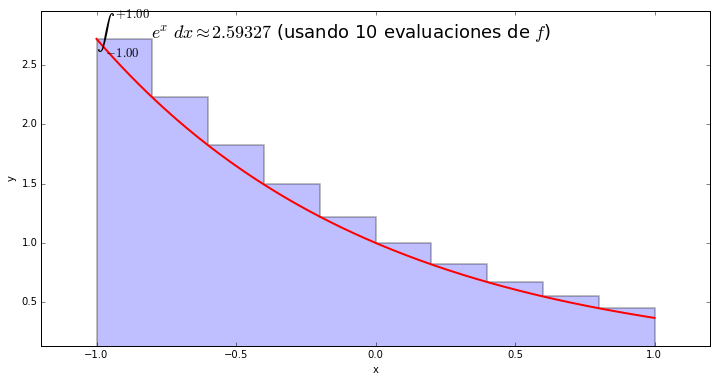

2.59327208249


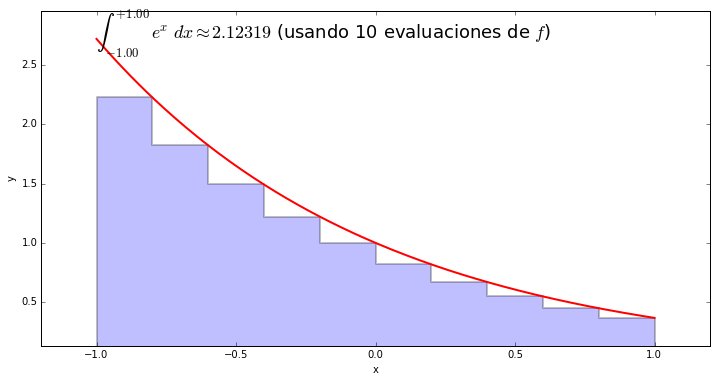

2.12319160504


In [14]:
###########################################################################
# Riemann Rule
###########################################################################
def riemann(myfun, N, a, b, direction="left", do_plot=True, text="", figname=""):
  f = np.vectorize(myfun) # So we can apply it to arrays without trouble
  x = np.linspace(a, b, N+1) # We want N bins, so N+1 points  
  dx = x[1]-x[0]
  if direction=="left":
    points = x[:-1]
  elif direction=="right":
    points = x[1:]
  else:
    print("Riemann Sum: choose left or right")
    return
  point_values = f(points)
  int_val = sum(point_values*dx)
  if do_plot:
    xbin = np.vstack([x[:-1], x[1:]]).flatten(1)
    ybin = np.vstack([point_values, point_values]).flatten(1)
    plot(f, xbin, ybin, int_val, N, text, figname)
  return int_val

print(riemann(myfun, N, a, b, direction="left", 
                  text=text, figname="riemann_left_%d.png"%N))
print(riemann(myfun, N, a, b, direction="right", 
                  text=text, figname="riemann_right_%d.png"%N))


## Midpoint ##

Al aplicar a un intervalo $[a,b]$ subdividido en $m$ segmentos y $m+1 \ \ $ puntos, $x_0, ..., x_{m+1} \ \ $, tenemos

\begin{align*}
\int_{a}^{b} f(x) dx = \sum_{i=1}^{m} \int_{x_{i-1}}^{x_{i}} f(x) dx  \\
                     = \sum_{i=1}^{m} h f(w_i) + \frac{(b-a)}{24} h^2 f''(c)
\end{align*}
donde $h=(b-a)/m \ \ \ $, 
$w_i=\frac{1}{2}(x_{i-1}+x_{i})\ \ \ $ 
y 
$\ \ c \in [a, b]$

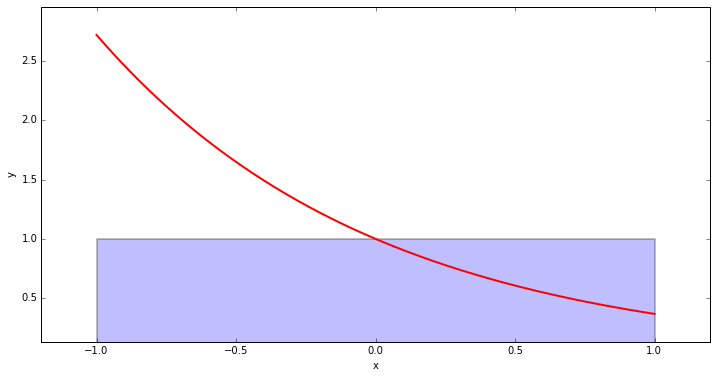

2.0


In [21]:
def midpoint(myfun, N, a, b, do_plot=True, text="", figname=""):
  f = np.vectorize(myfun) # So we can apply it to arrays without trouble
  x = np.linspace(a, b, N+1) # We want N bins, so N+1 points  
  dx = x[1]-x[0]
  midpoints = x[:-1] + .5*dx
  midpoint_values = f(midpoints)
  int_val = sum(midpoint_values*dx)
  if do_plot:
    xbin = np.vstack([x[:-1], x[1:]]).flatten(1)
    ybin = np.vstack([midpoint_values, midpoint_values]).flatten(1)
    plot(f, xbin, ybin, int_val, N, text, figname)
  return int_val

N = 1
#myfun = lambda x : x + 1
print(midpoint(myfun, N, a, b, 
                   text=text, figname="midpoint_%d.png"%N))

## Regla del Trapecio ##
Al aplicar a un intervalo $[a,b]$ subdividido en $m$ segmentos y $m+1 \ \ $ puntos, $x_0, ..., x_{m+1} \ \ $, tenemos
\begin{align*}
\int_{x_0}^{x_1} f(x) dx = \sum_{i=1}^{m} \int_{x_{i-1}}^{x_{i}} f(x) dx 
                         = \frac{h}{2}\left[f(a) + f(b) + 2\sum_{i=1}^{m-1} f(x_i) \right] - (b-a) \frac{h^2}{12} f''(c)
\end{align*}
donde $h=(b-a)/m \ \ \ $ y $c \in [a, b]$


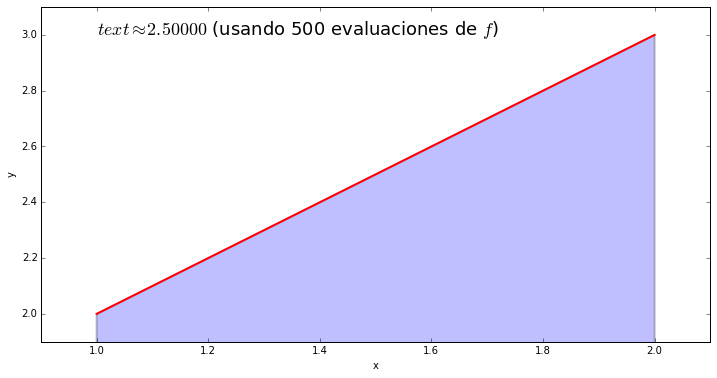

2.5


In [31]:
def trapezoid(myfun, N, a, b, do_plot=True, text="", figname=""):
  f = np.vectorize(myfun) # So we can apply it to arrays without trouble
  x = np.linspace(a, b, N+1) # We want N bins, so N+1 points  
  h = x[1]-x[0]
  xmiddle = x[1:-1]
  int_val = 0.5*h*(f(x[0])+2*sum(f(xmiddle))+f(x[-1]))
  if do_plot:
    xbin = x
    ybin = f(x) 
    plot(f, xbin, ybin, int_val, N, text, figname)
  return int_val

N = 4
#myfun = lambda x : x**2
print(trapezoid(myfun, N, a, b, 
                text=text, figname="trapezoid_%d.png"%N))

## Regla de Simpsons ##

Al aplicar a un intervalo $[a,b]$ subdividido en $m$ segmentos y $m+1 \ \ $ puntos, $x_0, ..., x_{m} \ \ $, con $m$ par, tenemos

\begin{align*}
\int_{a}^{b} f(x) dx = \frac{h}{3}(f(x_0) + \sum_{i=1}^{N-1} 6 f(x_i) +  f(x_N)) - (b-a)\frac{h^4}{90} f^{(4)}(c)
\end{align*}
con $h=(x_{i+1}-x_i) \ \ $ y $c \in [a, b]$


In [32]:
def simpsons(myfun, N, a, b, do_plot=True, text="", figname=""):
  f = np.vectorize(myfun) # So we can apply it to arrays without trouble
  x = np.linspace(a, b, N+1) # We want N bins, so N+1 points
  if N%2==1:
    print("Simpsons rule only applicable to even number of segments")
    return
  dx = x[1]-x[0]
  xleft   = x[:-2:2]
  xmiddle = x[1::2]
  xright  = x[2::2]
  int_val = sum((f(xleft)+4*f(xmiddle)+f(xright))*dx/3)
  if do_plot:
    xbin, ybin = simpsons_bins(f, xleft, xmiddle, xright)
    plot(f, xbin, ybin, int_val, N, text, figname)
  return int_val

def simpsons_bins(f, xleft, xmiddle, xright):
  xbin, ybin = [], []
  n = 21
  for x0, x1, x2 in zip(xleft, xmiddle, xright):
    x = np.linspace(x0, x2, n)
    y = (f(x0)*(x-x1)*(x-x2)) / ((x0-x1)*(x0-x2))
    y+= (f(x1)*(x-x0)*(x-x2)) / ((x1-x0)*(x1-x2))
    y+= (f(x2)*(x-x0)*(x-x1)) / ((x2-x0)*(x2-x1))
    xbin.extend(list(x))
    ybin.extend(list(y))
  return np.array(xbin), np.array(ybin)

print(simpsons(myfun, N, a, b, 
               text=text, figname="simpsons_%d.png"%N))

NameError: name 'text' is not defined

## Cuadratura Gaussiana ##

Este método utiliza la siguiente aproximación, para un intervalo $[-1,1]$:
\begin{align*}
\int_{a}^{b} f(x) dx = \sum_{i=1}^n w_i f(x_i)
\end{align*}
donde los $x_i$ se definen como las raíces del n-ésimo polinomio de Legendre $p_n(x)$:
\begin{align*}
p_n(x) = \frac{1}{2^n n!} \frac{d^n}{dx^n} \left[ (x^2 - 1)^n \right]
\end{align*}

Los $w_i$ son ...



Para un intervalo arbitrario $[a,b]$ es necesario trasladar apropiadamente la función.



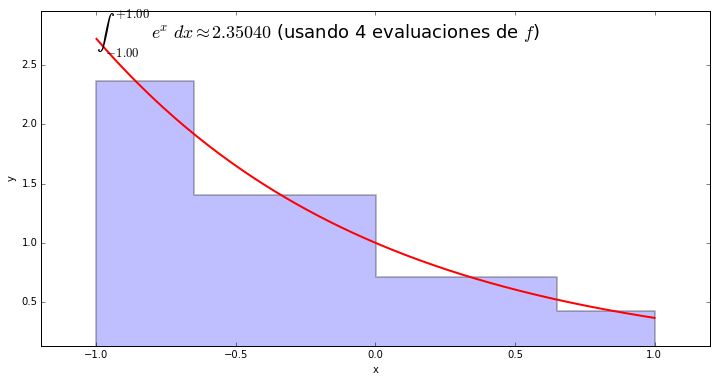

2.35040209216


In [30]:
def gaussianquad(myfun, N, a, b, do_plot=True, text="", figname=""):
  f = np.vectorize(myfun) # So we can apply it to arrays without trouble
  x, w = gaussian_nodes_and_weights(N, a, b)
  int_val = sum( w * f(x) )
  if do_plot:
    xbin, ybin = gaussian_bins(f, x, w)
    plot(f, xbin, ybin, int_val, N, text, figname)
  return int_val

def gaussian_nodes_and_weights(N, a, b):
  if N==1: return np.array([1]), np.array([2])
  beta = .5 / np.sqrt(1.-(2.*np.arange(1.,N))**(-2))
  T = np.diag(beta,1) + np.diag(beta,-1)
  D, V = np.linalg.eigh(T)
  x = D
  x = .5 * ( (b-a)*x + b + a) # Rescaling
  w = 2*V[0,:]**2
  w = .5*(b-a)*w
  return x, w

def gaussian_bins(f, x, w):
  z = [a] + list(a + w.cumsum())
  xbin = np.vstack([z[:-1], z[1:]]).flatten(1)
  z = f(x)
  ybin = np.vstack([z[:], z[:]]).flatten(1)
  return np.array(xbin), np.array(ybin)

print(gaussianquad(myfun, N, a, b, 
                   text=text, figname="gaussianquad_%d.png"%N))